In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [59]:
df=pd.read_csv('data1 (2).csv')

In [60]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [11]:
df.info() #checking datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


## Data Cleaning

In [5]:
#Checking for null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#Dropping duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(299, 9)

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
#Our data is clean now. We don't have any null values and duplicates have been removed

In [61]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


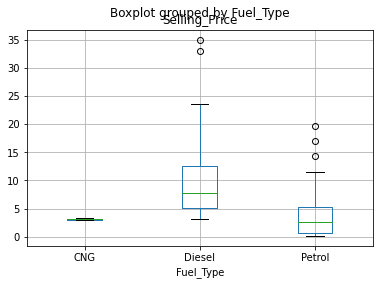

In [68]:
df.boxplot(by='Fuel_Type',column='Selling_Price')

## Inference 
Diesel Cars have higher selling prices

## Data Preparation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


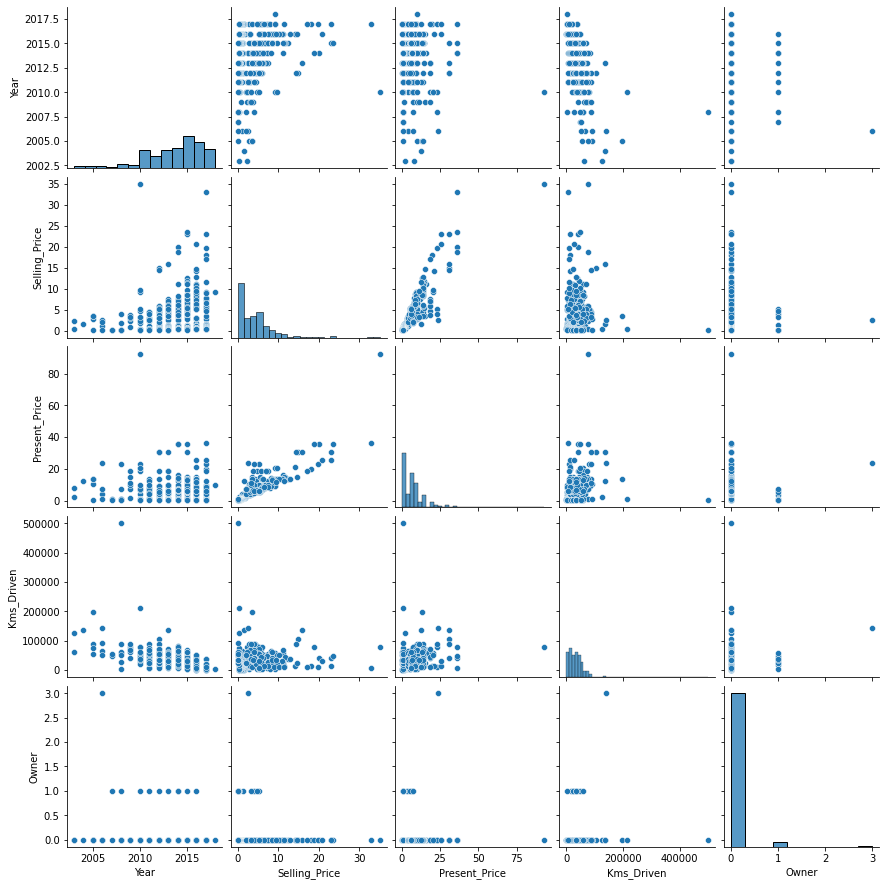

In [17]:
sns.pairplot(df)

## Inference
We can see that selling price for cars is higher when kms_driven are lesser and owners are the first owner

In [14]:
#Our target column is selling Price
#We can drop columns which won't contribute to our prediction of price

In [15]:
df.drop('Car_Name',axis=1,inplace=True)

In [18]:
#We can convert the Year column to number of years
df['current_year']=2023
df['Year']=df['current_year']-df['Year']

In [20]:
df.drop('current_year',axis=1,inplace=True)

In [21]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,9,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
#Finding unique values for categorical Columns (Fuel_Type,Seller_Type,Transmission)
df['Fuel_Type'].nunique()
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [26]:
df['Seller_Type'].value_counts()

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [27]:
df['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [28]:
#Converting Catergorical Data into dummies
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,3.35,5.59,27000,0,0,1,0,1
1,10,4.75,9.54,43000,0,1,0,0,1
2,6,7.25,9.85,6900,0,0,1,0,1
3,12,2.85,4.15,5200,0,0,1,0,1
4,9,4.60,6.87,42450,0,1,0,0,1


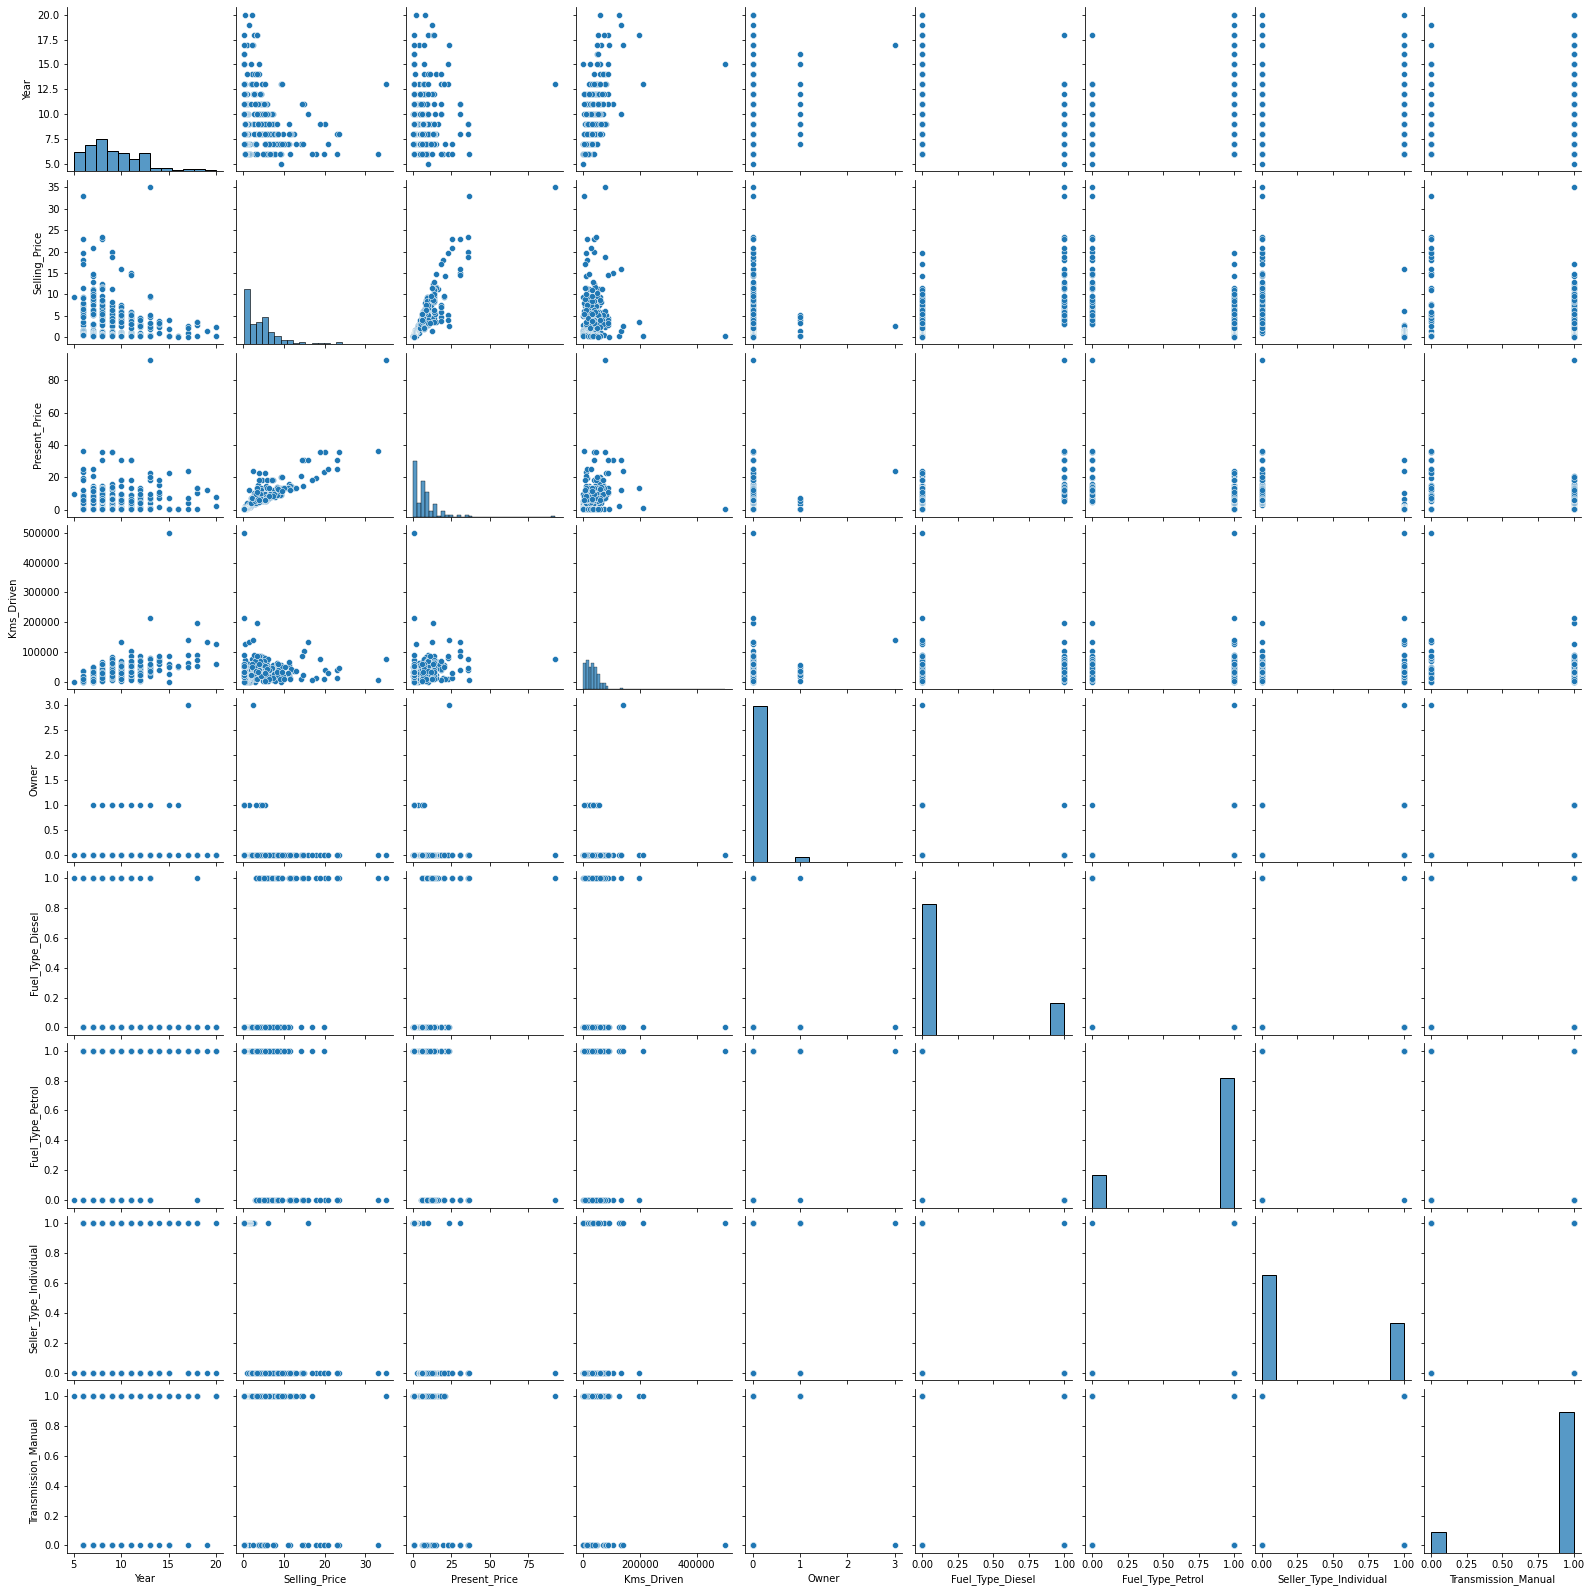

In [30]:
sns.pairplot(df)

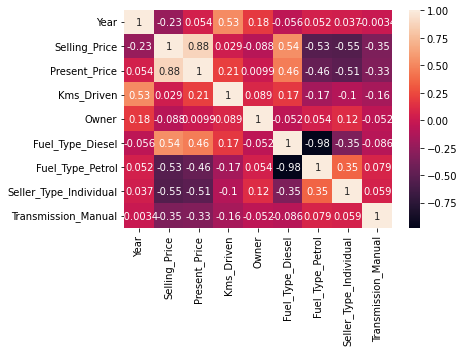

In [32]:
#finding correlations  in our data using heatmap
sns.heatmap(df.corr(),annot=True)

## Model 

In [33]:
#Splitting our data into dependant and independant variables
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [34]:
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,9,5.59,27000,0,0,1,0,1
1,10,9.54,43000,0,1,0,0,1
2,6,9.85,6900,0,0,1,0,1
3,12,4.15,5200,0,0,1,0,1
4,9,6.87,42450,0,1,0,0,1


In [35]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [36]:
#Spliting our data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=29)

In [37]:
#Scaling our independant variables using MinMax scaler to bring all the values in same range
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [39]:
print(X_train[0])

[0.21428571 0.00682705 0.03223223 0.         0.         1.
 1.         1.        ]


In [40]:
#Using Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [41]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [45]:
y_pred=model.predict(X_test)
y_pred

array([-0.73330682,  3.00711411,  2.20976748,  2.60803167,  2.14984784,
        1.77172453,  6.17605123,  7.10895546,  1.41742728, -3.56172871,
        2.4271405 ,  5.69491219,  1.77663169,  2.06656629,  4.20188217,
        3.38156355,  2.10260415,  5.17585791,  8.16223289, -0.36920444,
        4.03734806, 10.61802601,  3.36759827,  4.83207378,  4.32512433,
        0.20564325, -2.32316472,  1.6250722 ,  1.5656722 , 20.04258526,
        1.55321501, -2.24832026, -4.33544953,  2.13549299,  2.9164473 ,
        6.89063722,  3.10939802,  1.97594887,  6.19470781,  7.05938418,
       -1.2272626 ,  3.23537378,  6.86907661,  0.05720804,  9.17701021,
       -0.15153645,  1.41245005,  7.43307339,  0.17502152,  7.64141982,
        0.05100169,  5.08467381,  7.85720954,  1.56976321, -1.13511375,
        5.17365097,  9.46527766,  6.85505962,  9.93936152,  9.99113382])

In [ ]:
y_test

In [44]:
model.score(X_test,y_test)

0.8191675248059979

In [57]:
#using Decision Tree
from sklearn.tree import DecisionTreeRegressor
model3=DecisionTreeRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9325223968979458

In [47]:
#We can see the accuracy of our model is around 81% but it is giving some negative values which are our errors

In [48]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(X_train,y_train)


RandomForestRegressor()

In [50]:
y_pred=model2.predict(X_test)
y_pred

array([ 0.3178,  2.7805,  0.3553,  2.7315,  0.7738,  1.2005,  4.9665,
        8.8675,  1.1725,  0.1955,  2.8425,  5.928 ,  2.7275,  1.099 ,
        4.181 ,  2.838 ,  0.6347,  6.011 ,  9.6055,  2.2426,  2.876 ,
       11.0043,  3.923 ,  3.86  ,  4.7635,  1.135 ,  0.2067,  0.6079,
        0.6378, 19.5588,  0.5681,  0.4107,  0.9975,  1.518 ,  2.935 ,
        5.1166,  0.439 ,  0.4612,  7.8032,  5.8736,  0.2995,  0.4283,
        8.5894,  0.3011, 10.0175,  0.5975,  1.152 ,  6.039 ,  2.8589,
        8.793 ,  0.3064,  5.78  ,  7.8863,  2.4865,  0.4816,  4.1255,
        9.5605,  5.9049, 10.8887, 10.4887])

In [51]:
model2.score(X_test,y_test)

0.9497429192987618

In [ ]:
#Using RandomForestRegressor we have increased our accuracy to around 94%

In [52]:
#Finding Errors
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [53]:
mean_absolute_error(y_test,y_pred)

0.5588133333333334

In [54]:
mean_squared_error(y_test,y_pred)

0.8579906393333336

In [56]:
print('MAE: ' ,mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  0.5588133333333334
MSE:  0.8579906393333336
RMSE:  0.9262778413269604


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


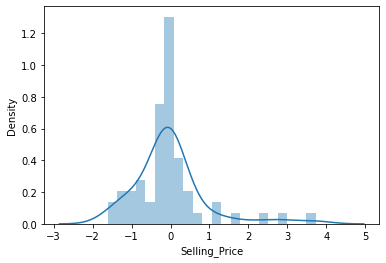

In [55]:
sns.distplot(y_test - y_pred)